In [1]:
import random
import json

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neighbors

from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm

In [2]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
import warnings; warnings.simplefilter('ignore')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [6]:
def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

In [7]:
def R2(y_true, y_pred):
    return  1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

In [8]:
data = pd.read_csv('./csv/data_norm.csv')

In [9]:
data.head()

,0_S2_B01,0_S2_B02,0_S2_B03,0_S2_B04,0_S2_B05,0_S2_B06,0_S2_B07,0_S2_B08,0_S2_B8A,0_S2_B09,0_S2_B10,0_S2_B11,0_S2_B12,1_S2_B01,1_S2_B02,1_S2_B03,1_S2_B04,1_S2_B05,1_S2_B06,1_S2_B07,1_S2_B08,1_S2_B8A,1_S2_B09,1_S2_B10,1_S2_B11,1_S2_B12,2_S2_B01,2_S2_B02,2_S2_B03,2_S2_B04,2_S2_B05,2_S2_B06,2_S2_B07,2_S2_B08,2_S2_B8A,2_S2_B09,2_S2_B10,2_S2_B11,2_S2_B12,3_S2_B01,3_S2_B02,3_S2_B03,3_S2_B04,3_S2_B05,3_S2_B06,3_S2_B07,3_S2_B08,3_S2_B8A,3_S2_B09,3_S2_B10,3_S2_B11,3_S2_B12,4_S2_B01,4_S2_B02,4_S2_B03,4_S2_B04,4_S2_B05,4_S2_B06,4_S2_B07,4_S2_B08,4_S2_B8A,4_S2_B09,4_S2_B10,4_S2_B11,4_S2_B12,5_S2_B01,5_S2_B02,5_S2_B03,5_S2_B04,5_S2_B05,5_S2_B06,5_S2_B07,5_S2_B08,5_S2_B8A,5_S2_B09,5_S2_B10,5_S2_B11,5_S2_B12,6_S2_B01,6_S2_B02,6_S2_B03,6_S2_B04,6_S2_B05,6_S2_B06,6_S2_B07,6_S2_B08,6_S2_B8A,6_S2_B09,6_S2_B10,6_S2_B11,6_S2_B12,7_S2_B01,7_S2_B02,7_S2_B03,7_S2_B04,7_S2_B05,7_S2_B06,7_S2_B07,7_S2_B08,7_S2_B8A,7_S2_B09,7_S2_B10,7_S2_B11,7_S2_B12,8_S2_B01,8_S2_B02,8_S2_B03,8_S2_B04,8_S2_B05,8_S2_B06,8_S2_B07,8_S2_B08,8_S2_B8A,8_S2_B09,8_S2_B10,8_S2_B11,8_S2_B12,9_S2_B01,9_S2_B02,9_S2_B03,9_S2_B04,9_S2_B05,9_S2_B06,9_S2_B07,9_S2_B08,9_S2_B8A,9_S2_B09,9_S2_B10,9_S2_B11,9_S2_B12,10_S2_B01,10_S2_B02,10_S2_B03,10_S2_B04,10_S2_B05,10_S2_B06,10_S2_B07,10_S2_B08,10_S2_B8A,10_S2_B09,10_S2_B10,10_S2_B11,10_S2_B12,11_S2_B01,11_S2_B02,11_S2_B03,11_S2_B04,11_S2_B05,11_S2_B06,11_S2_B07,11_S2_B08,11_S2_B8A,11_S2_B09,11_S2_B10,11_S2_B11,11_S2_B12,Field_ID,Yield,Year,0_NDVI,1_NDVI,2_NDVI,3_NDVI,4_NDVI,5_NDVI,6_NDVI,7_NDVI,8_NDVI,9_NDVI,10_NDVI,11_NDVI,0_ATSAVI,1_ATSAVI,2_ATSAVI,3_ATSAVI,4_ATSAVI,5_ATSAVI,6_ATSAVI,7_ATSAVI,8_ATSAVI,9_ATSAVI,10_ATSAVI,11_ATSAVI,0_ARVI2,1_ARVI2,2_ARVI2,3_ARVI2,4_ARVI2,5_ARVI2,6_ARVI2,7_ARVI2,8_ARVI2,9_ARVI2,10_ARVI2,11_ARVI2,0_CIrededge,1_CIrededge,2_CIrededge,3_CIrededge,4_CIrededge,5_CIrededge,6_CIrededge,7_CIrededge,8_CIrededge,9_CIrededge,10_CIrededge,11_CIrededge,0_GARI,1_GARI,2_GARI,3_GARI,4_GARI,5_GARI,6_GARI,7_GARI,8_GARI,9_GARI,10_GARI,11_GARI,0_CVI,1_CVI,2_CVI,3_CVI,4_CVI,5_CVI,6_CVI,7_CVI,8_CVI,9_CVI,10_CVI,11_CVI,0_LCI,1_LCI,2_LCI,3_LCI,4_LCI,5_LCI,6_LCI,7_LCI,8_LCI,9_LCI,10_LCI,11_LCI,0_MVI,1_MVI,2_MVI,3_MVI,4_MVI,5_MVI,6_MVI,...,9_LCI_MEAN,9_LCI_MAX,9_MVI_MIN,9_MVI_MEAN,9_MVI_MAX,9_mARI_MIN,9_mARI_MEAN,9_mARI_MAX,9_NDRE_MIN,9_NDRE_MEAN,9_NDRE_MAX,9_CLIM_aet_MIN,9_CLIM_aet_MEAN,9_CLIM_aet_MAX,9_CLIM_pet_MIN,9_CLIM_pet_MEAN,9_CLIM_pet_MAX,9_CLIM_pr_MIN,9_CLIM_pr_MEAN,9_CLIM_pr_MAX,9_CLIM_soil_MIN,9_CLIM_soil_MEAN,9_CLIM_soil_MAX,9_CLIM_srad_MIN,9_CLIM_srad_MEAN,9_CLIM_srad_MAX,9_CLIM_tmmn_MIN,9_CLIM_tmmn_MEAN,9_CLIM_tmmn_MAX,9_CLIM_tmmx_MIN,9_CLIM_tmmx_MEAN,9_CLIM_tmmx_MAX,9_CLIM_vap_MIN,9_CLIM_vap_MEAN,9_CLIM_vap_MAX,9_CLIM_vpd_MIN,9_CLIM_vpd_MEAN,9_CLIM_vpd_MAX,9_CLIM_vs_MIN,9_CLIM_vs_MEAN,9_CLIM_vs_MAX,10_S2_B01_MIN,10_S2_B01_MEAN,10_S2_B01_MAX,10_S2_B02_MIN,10_S2_B02_MEAN,10_S2_B02_MAX,10_S2_B03_MIN,10_S2_B03_MEAN,10_S2_B03_MAX,10_S2_B04_MIN,10_S2_B04_MEAN,10_S2_B04_MAX,10_S2_B05_MIN,10_S2_B05_MEAN,10_S2_B05_MAX,10_S2_B06_MIN,10_S2_B06_MEAN,10_S2_B06_MAX,10_S2_B07_MIN,10_S2_B07_MEAN,10_S2_B07_MAX,10_S2_B08_MIN,10_S2_B08_MEAN,10_S2_B08_MAX,10_S2_B8A_MIN,10_S2_B8A_MEAN,10_S2_B8A_MAX,10_S2_B09_MIN,10_S2_B09_MEAN,10_S2_B09_MAX,10_S2_B10_MIN,10_S2_B10_MEAN,10_S2_B10_MAX,10_S2_B11_MIN,10_S2_B11_MEAN,10_S2_B11_MAX,10_S2_B12_MIN,10_S2_B12_MEAN,10_S2_B12_MAX,10_NDVI_MIN,10_NDVI_MEAN,10_NDVI_MAX,10_ATSAVI_MIN,10_ATSAVI_MEAN,10_ATSAVI_MAX,10_ARVI2_MIN,10_ARVI2_MEAN,10_ARVI2_MAX,10_GARI_MIN,10_GARI_MEAN,10_GARI_MAX,10_CIrededge_MIN,10_CIrededge_MEAN,10_CIrededge_MAX,10_CVI_MIN,10_CVI_MEAN,10_CVI_MAX,10_LCI_MIN,10_LCI_MEAN,10_LCI_MAX,10_MVI_MIN,10_MVI_MEAN,10_MVI_MAX,10_mARI_MIN,10_mARI_MEAN,10_mARI_MAX,10_NDRE_MIN,10_NDRE_MEAN,10_NDRE_MAX,10_CLIM_aet_MIN,10_CLIM_aet_MEAN,10_CLIM_aet_MAX,10_CLIM_pet_MIN,10_CLIM_pet_MEAN,10_CLIM_pet_MAX,10_CLIM_pr_MIN,10_CLIM_pr_MEAN,10_CLIM_pr_MAX,10_CLIM_soil_MIN,10_CLIM_soil_MEAN,10_CLIM_soil_MAX,10_CLIM_srad_MIN,10_CLIM_srad_MEAN,10_CLIM_srad_MAX,10_CLIM_tmmn_MIN,10_CLIM_tmmn_MEAN,10_CLIM_tmmn_MAX

In [10]:
'dataset mean {:.3f} dataset RMSE {:.3f}'.format(data.Yield.mean(), RMSE(data.Yield.mean(), data.Yield))

'dataset mean 3.216 dataset RMSE 1.722'

In [11]:
# load dict of features groups
with open("./csv/features_groups.json", "r") as read_file:
    features_dict = json.load(read_file)
features_dict.keys()

dict_keys(['const', 'monthly', 'min', 'mean', 'max', 'corr_features'])

In [12]:
def find_stat_features(features, month):
    stat_features = [feature for feature in features if int(feature.split('_')[0])==month]
    return(stat_features)

In [13]:
stat_features = find_stat_features(features_dict['min']+features_dict['max']+features_dict['mean'], 11)

In [14]:
f_list = features_dict['const']+features_dict['monthly'] + stat_features

In [15]:
len(f_list)

554

In [16]:
data[f_list] = data[f_list].fillna(data[f_list].mean())

In [17]:
# load dict of ids for splitting 
with open("./csv/split.json", "r") as read_file:
    split = json.load(read_file)
split.keys()

dict_keys(['train_ids', 'test_ids', 'year_split'])

In [18]:
def make_train_valid(df, features, train_idx, valid_idx, test_idx):    
    
    #train/valid split
    train = df.loc[df.Field_ID.isin(train_idx)]
    valid = df.loc[df.Field_ID.isin(valid_idx)]
    test = df.loc[df.Field_ID.isin(test_idx)].sort_values(by=['Field_ID'])
    
    xTrain, yTrain = train[features].values, train['Yield'].values
    xValid, yValid = valid[features].values, valid['Yield'].values
    xTest = test[features].values
    
    return (xTrain, yTrain, xValid, yValid, xTest)

# Catboost

In [19]:
selected_features_list = []

for year, (train_index, valid_index) in split['year_split'].items():

    xTrain_norm, yTrain, xValid_norm, yValid, xTest_norm = make_train_valid(data, f_list, train_index, valid_index, split['test_ids'])
    
    train_pool = Pool(xTrain_norm, yTrain, feature_names=f_list)
    test_pool = Pool(xValid_norm, yValid, feature_names=f_list)
    
    cb = CatBoostRegressor(loss_function='RMSE', n_estimators=1000, max_depth=5,  random_state = RANDOM_SEED, silent = False)
    
    summary = cb.select_features(
        train_pool,
        eval_set=test_pool,
        features_for_select = f_list,
        num_features_to_select=len(f_list)//4,
        steps=9,
        algorithm=EFeaturesSelectionAlgorithm.RecursiveByLossFunctionChange,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=True,
        logging_level='Silent',
        plot=False
    )
    print(year)
    selected_features_list.append(summary['selected_features_names']) 

2019
2018
2017
2016


In [20]:
selected_features = []
for l in selected_features_list:
    for f in l:
        if f not in selected_features:
            selected_features.append(f)

In [21]:
len(selected_features)

357

## Check Feature selection

In [22]:
valid_predict_list = []
test_predict_list = []

train_rmse_list = []
valid_rmse_list = []

train_r2_list = []
valid_r2_list = []

feat_impot_list = []

cb = CatBoostRegressor(loss_function='RMSE', n_estimators=1000, max_depth=5,  random_state = RANDOM_SEED, silent = False)

for f, (train_index, valid_index) in split['year_split'].items():

    xTrain_norm, yTrain, xValid_norm, yValid, xTest_norm = make_train_valid(data, selected_features, train_index, valid_index, split['test_ids'])

    cb.fit(xTrain_norm, yTrain, eval_set = (xValid_norm, yValid),  verbose=False)

    yPred_Train = cb.predict(xTrain_norm)
    yPred_Valid = cb.predict(xValid_norm)
    
    valid_predict_list.append([yValid, yPred_Valid])
    test_predict_list.append(cb.predict(xTest_norm))

    train_rmse_list.append(RMSE(yTrain, yPred_Train))
    valid_rmse_list.append(RMSE(yValid, yPred_Valid))

    train_r2_list.append(R2(yTrain, yPred_Train))
    valid_r2_list.append(R2(yValid, yPred_Valid))
    
    feat_impot_list.append(cb.feature_importances_.astype(float))
    
rmse_train = np.mean(train_rmse_list)
rmse_valid = np.mean(valid_rmse_list)

r2_train = np.mean(train_r2_list)
r2_valid = np.mean(valid_r2_list)
    
print('train RMSE {:0.2f} / valid RMSE {:0.2f}'.format(rmse_train, rmse_valid))
print('train CORR {:0.2f} / valid CORR {:0.2f}'.format(r2_train, r2_valid))

train RMSE 1.34 / valid RMSE 1.62
train CORR 0.38 / valid CORR 0.10


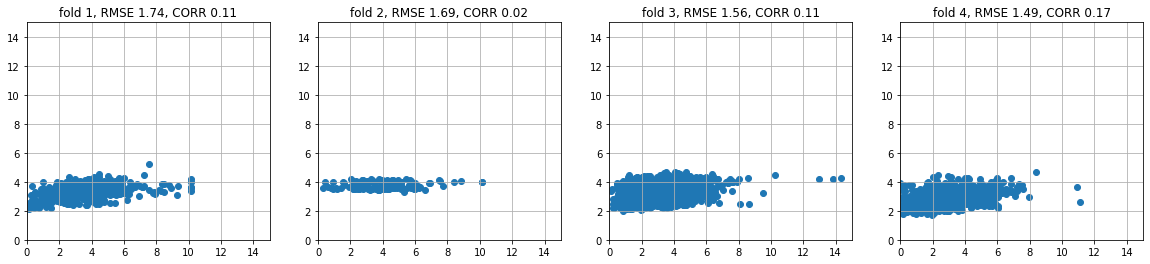

In [23]:
fig, ax = plt.subplots(1, len(valid_predict_list), figsize = (20, 4))
for f, (gt, pred) in enumerate(valid_predict_list):
    ax[f].set_title('fold {}, RMSE {:.2f}, CORR {:.2f}'.format(f+1, valid_rmse_list[f], valid_r2_list[f]))
    ax[f].scatter(gt, pred)
    ax[f].set_xlim(0, 15)
    ax[f].set_ylim(0, 15)
    ax[f].grid()

In [24]:
feat_impot_df = pd.DataFrame({
    'features':selected_features,
    'importarnce': np.mean(np.array(feat_impot_list), axis=0)
})
feat_impot_df = feat_impot_df.sort_values(by=['importarnce'], ascending = False).reset_index(drop=True)

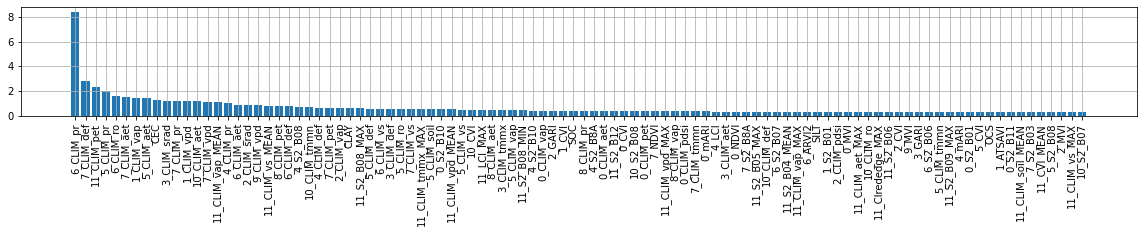

In [25]:
plt.figure(figsize = (20,2))
plt.bar(feat_impot_df.features[:100], feat_impot_df.importarnce[:100])
# plt.ylim(0,0.4)
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [26]:
test_df = data.loc[data.Field_ID.isin(split['test_ids'])].sort_values(by=['Field_ID'])

In [27]:
test_df['Yield'] = np.mean(test_predict_list, axis=0)

In [29]:
test_df[['Field_ID', 'Yield']].to_csv('./predicts/Submission_CB_monthly_stat_FS_357.csv', index = False)
# result score - 1.764270283808337

In [32]:
result_dict = {}
result_dict['features'] = selected_features
result_dict['RMSE'] = rmse_valid
result_dict['R2'] = r2_valid
result_dict['score'] = 1.764270283808337

In [34]:
import json
with open('./csv/feature_selection.json', 'w') as file:
    json.dump(result_dict, file)